In [17]:
from funcoes.funcoes import *

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [18]:
LC_defaults = pd.read_csv('dados/dados_WoE_VI_LGD_EAD_regressao.csv')

# Modelo de Exposição por Inadimplência
___

In [20]:
LC_defaults.shape

(466285, 111)

In [21]:
# separando dados

X = LC_defaults.drop(['target', 'taxa_recuperacao','taxa_recuperacao_0_1','fator_conversao_credito'], axis = 1)
y = LC_defaults['fator_conversao_credito']

In [22]:
# separando dados de teste e treino

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [23]:
reg_ead = LinearRegression()
reg_ead.fit(X_train, y_train)

LinearRegression()

In [24]:
nomes_features = X_train.columns.values

In [25]:
tabela_sumario = pd.DataFrame(columns = ['nome_feature'], data = nomes_features)
tabela_sumario['coeficiente'] = np.transpose(reg_ead.coef_)
tabela_sumario.index = tabela_sumario.index + 1
tabela_sumario.loc[0] = ['intercept', reg_ead.intercept_]
tabela_sumario = tabela_sumario.sort_index()

p_values = reg_ead.p
p_values = np.append(np.nan,np.array(p_values))
tabela_sumario['p_valor'] = p_values.round(3)
tabela_sumario

,nome_feature,coeficiente,p_valor
0,intercept,0.118780,NaN
1,grade:A,0.001909,0.555
2,grade:B,0.005709,0.045
3,grade:C,0.010412,0.000
4,grade:D,0.012698,0.000
...,...,...,...
103,mths_since_last_record:81-86,0.005202,0.251
104,mths_since_last_record:>86,0.002581,0.514
105,funded_amnt,0.000049,0.000
106,total_rec_prncp,-0.000041,0.000


### Validação do modelo

In [26]:
y_hat_test_ead = reg_ead.predict(X_test)

In [27]:
# baixa correlação, mas satisfatória para um modelo EAD
# caso a correlação fosse muito alta, o modelo teria que ser refeito

y_test_temp = y_test
y_test_temp = y_test_temp.reset_index(drop = True)
pd.concat([y_test_temp, pd.DataFrame(y_hat_test_ead)], axis = 1).corr()

,fator_conversao_credito,0
fator_conversao_credito,1.00000,0.87118
0,0.87118,1.00000


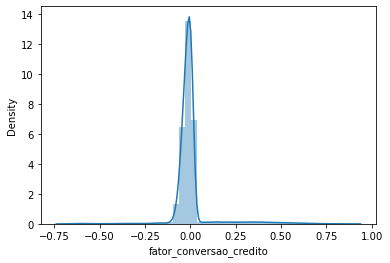

In [28]:
# distribuição concentrada perto de zero, condizendo com os dados
# então o modelo é aceitável metodologicamente

sns.distplot(y_test - y_hat_test_ead);

In [29]:
pd.DataFrame(y_hat_test_ead).describe()

,0
count,139886.000000
mean,0.068715
std,0.195034
min,-0.052226
25%,-0.000458
50%,0.016840
75%,0.040392
max,1.708644


In [30]:
y_hat_test_ead = np.where(y_hat_test_ead < 0, 0, y_hat_test_ead)
y_hat_test_ead = np.where(y_hat_test_ead > 1, 1, y_hat_test_ead)

In [31]:
# valores máximos e mínimos dentro dos valores que deveriam ser preditos, 1 e 0

pd.DataFrame(y_hat_test_ead).describe()

,0
count,139886.000000
mean,0.068542
std,0.176148
min,0.000000
25%,0.000000
50%,0.016840
75%,0.040392
max,1.000000


In [32]:
# salvando modelo

import pickle
pickle.dump(reg_ead, open('modelos/modelo_ead_v1.sav', 'wb'))

---